In [39]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from pyntcloud.io import read_ply
from pyntcloud import PyntCloud
import pandas as pd
import open3d as o3d 


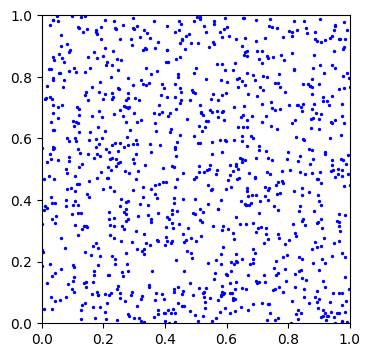

In [10]:
'''White noise sampling'''

def white_noise_sampling(num_points, domain_size):
    points = np.random.uniform(0, domain_size, size=(num_points, 2))
    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = white_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()

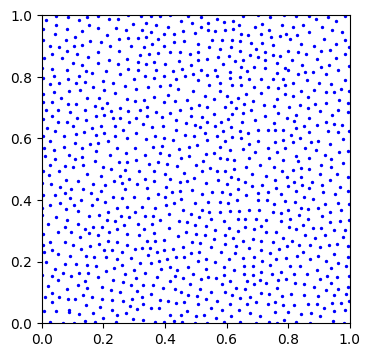

In [8]:
'''Blue noise sampling'''

def blue_noise_sampling(num_points, domain_size):
    # Generate the first 10 points randomly
    points = np.random.uniform(0, domain_size, size=(100, 2))
    
    # Keep adding new points until we have enough
    while len(points) < num_points:
        # Generate 10 candidate points randomly
        candidates = np.random.uniform(0, domain_size, size=(100, 2))
        
        # Compute the minimum distance to any existing point for each candidate
        distances = np.min(np.linalg.norm(points - candidates[:, np.newaxis], axis=2), axis=1)
        
        # Add the candidate with the maximum minimum distance to the point set
        points = np.concatenate([points, candidates[np.argmax(distances), np.newaxis]])
    
    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = blue_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()

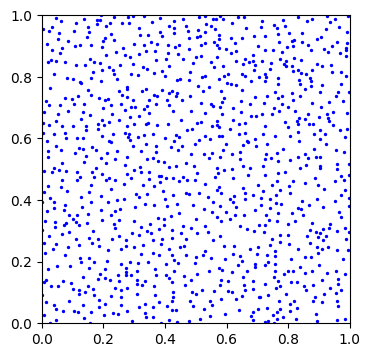

In [4]:
'''Red noise sampling'''


def red_noise_sampling(num_points, domain_size):
    # Generate the first 10 points randomly
    points = np.random.uniform(0, domain_size, size=(100, 2))

    # Keep adding new points until we have enough
    while len(points) < num_points:
        # Generate 10 candidate points randomly
        candidates = np.random.uniform(0, domain_size, size=(100, 2))

        # Compute the minimum distance to any existing point for each candidate
        distances = np.min(np.linalg.norm(points - candidates[:, np.newaxis], axis=2), axis=1)

        # Compute the normalized minimum distances
        normalized_distances = distances / np.max(distances)

        # Compute the probability of selecting each candidate point
        probabilities = normalized_distances ** 2
        probabilities /= np.sum(probabilities)

        # Add a candidate point with probability proportional to its distance to existing points
        new_point = candidates[np.random.choice(len(candidates), p=probabilities)]
        points = np.concatenate([points, new_point[np.newaxis]])

    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = red_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()


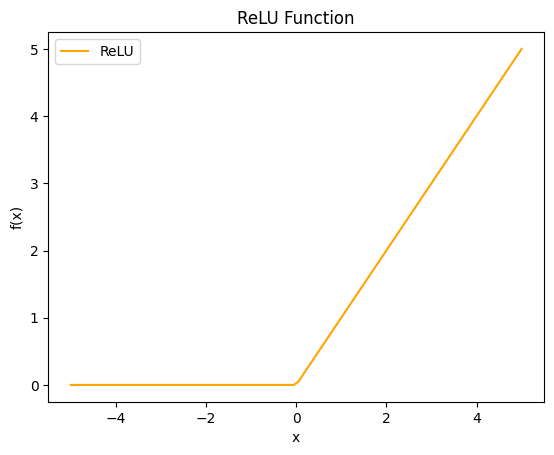

In [30]:
'''Sigmoid and ReLU functions'''


def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-5, 5, 100)

# Compute y values for ReLU function

y_relu = relu(x)

# Plotting the functions

plt.plot(x, y_relu, label='ReLU', color='orange')

# Set plot title and labels
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('f(x)')

# Set legend
plt.legend()

# Display the plot
plt.show()

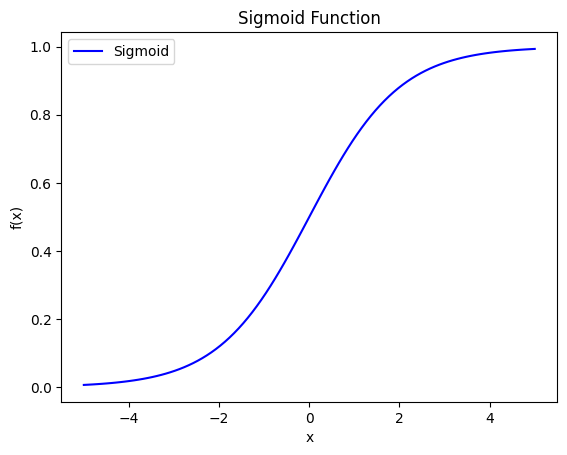

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-5, 5, 100)

# Compute y values for sigmoid function
y_sigmoid = sigmoid(x)

# Plotting the sigmoid function
plt.plot(x, y_sigmoid, label='Sigmoid', color='blue')

# Set plot title and labels
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')

# Set legend
plt.legend()

# Display the plot
plt.show()

In [40]:
model = read_ply("C:/Users/vipasyan/Thesis/Task1/OLD-Nerf/logs/chair_test/chair_surfels_cn.ply")

In [41]:
model["points"].head()

,x,y,z,nx,ny,nz,red,green,blue
0,-0.352237,-0.407930,-0.126127,0.569363,0.767931,0.341525,145,196,87
1,0.048998,-0.317916,-0.292692,0.583409,0.684708,0.382013,149,175,97
2,-0.312356,0.174736,-0.146654,0.456656,0.551709,0.235478,116,141,60
3,0.101500,-0.633639,-0.156154,0.707142,0.816617,0.463237,180,208,118
4,0.030551,-0.219722,-0.363204,0.501769,0.539709,0.336526,128,138,86


In [42]:
model["points"].tail()

,x,y,z,nx,ny,nz,red,green,blue
181851,-0.179815,0.513867,-0.327171,0.645750,0.528556,0.405422,165,135,103
181852,0.251007,-0.021819,-0.162776,0.442921,0.533044,0.306397,113,136,78
181853,0.497326,0.451194,-0.839380,1.000000,1.000000,1.000000,255,255,255
181854,-0.350864,-0.210345,-0.230282,0.479161,0.636819,0.303407,122,162,77
181855,0.214786,-0.091485,-0.244457,0.465756,0.536882,0.287746,119,137,73
